#  Netflix Dataset Analysis  

This project explores the Netflix Movies and TV Shows dataset to identify trends and insights.  

The Goals here are to:
- Clean and preprocess the dataset  
- Explore trends (movies vs TV shows, content growth, countries, ratings)  
- Visualise the findings  
- Highlight key insights

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")


In [10]:
# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# First 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


The Data Cleaning Part

Before analysing, we need to:  
- Check for missing values  
- Remove duplicates  
- Standardise column formats  
- Convert dates to proper format  


In [11]:
# Check for missing values
df.isnull().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill missing director values with "Unknown"
df['director'] = df['director'].fillna("Unknown")

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')


Exploratory Data Analysis (EDA) Part

What we are going to analyse and explore:
1. Movies vs TV Shows  
2. Content growth over time  
3. Most common ratings  
4. Top countries producing content  
5. Top 10 directors

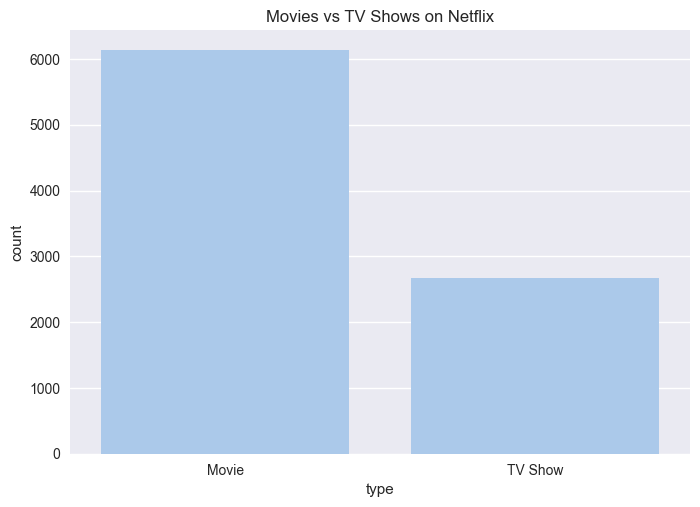

In [12]:
# 1. Movies vs TV Shows
sns.countplot(x="type", data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()


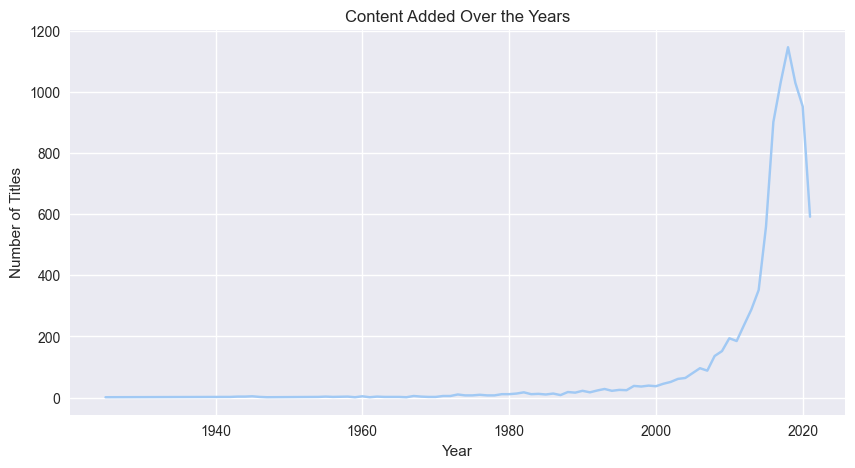

In [13]:
# 2. Content growth over the years
df['release_year'].value_counts().sort_index().plot(kind="line", figsize=(10,5))
plt.title("Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

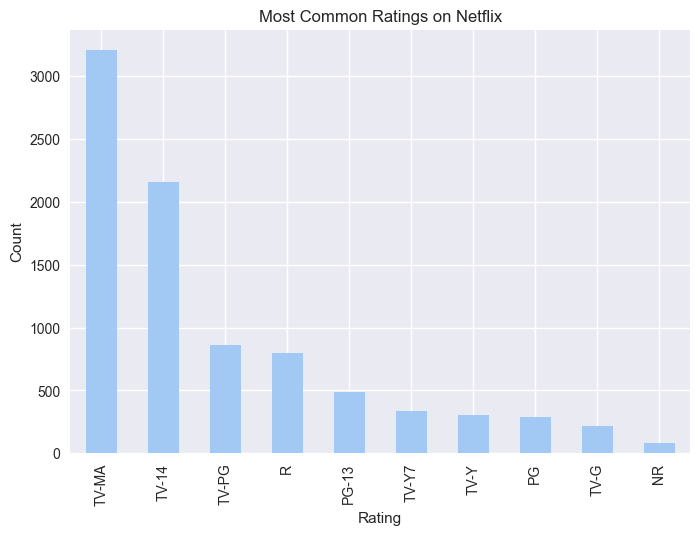

In [14]:
# 3. Most common ratings
df['rating'].value_counts().head(10).plot(kind="bar")
plt.title("Most Common Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

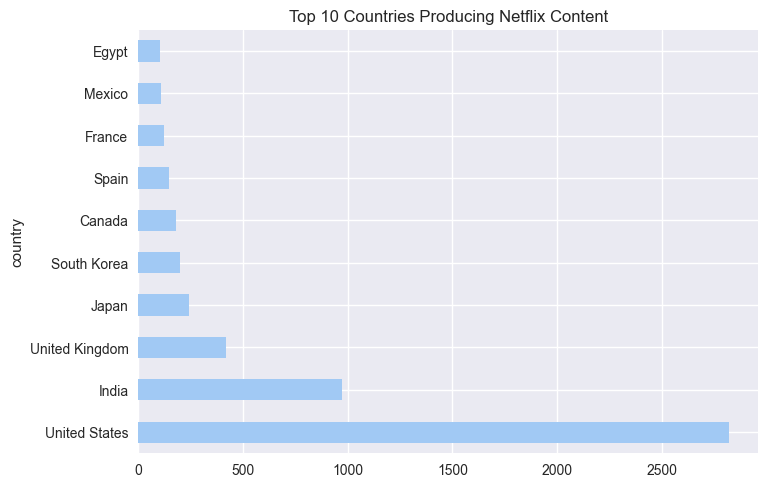

In [15]:
# 4. Top 10 countries producing content
df['country'].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()

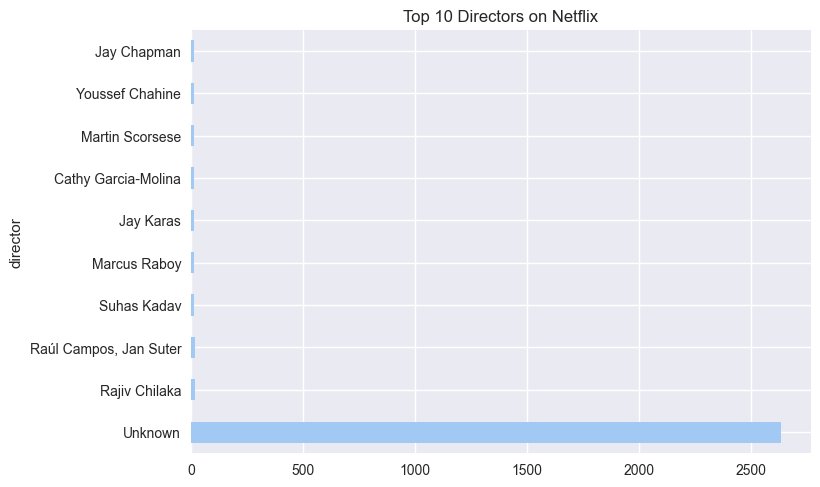

In [16]:
# 5. Top 10 directors
df['director'].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Directors on Netflix")
plt.show()

 Insights gathered from analysis in bullet points:

- Netflix has more movies than TV shows.  
- Content has rapidly grown after 2015.  
- USA and India produce the highest number of Netflix titles.  
- Most content is rated **TV-MA** (adult audiences).  
- Only a few directors dominate Netflix's catalog.  
